# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

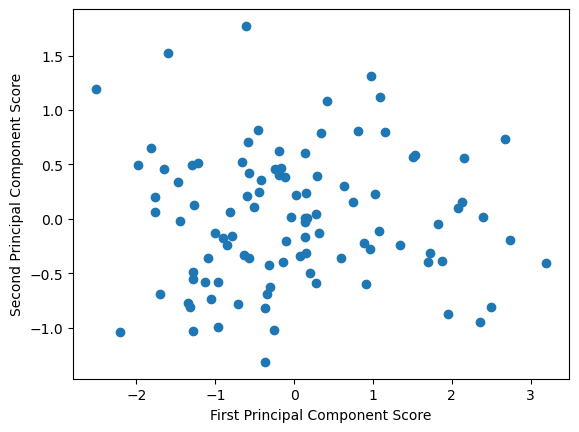

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

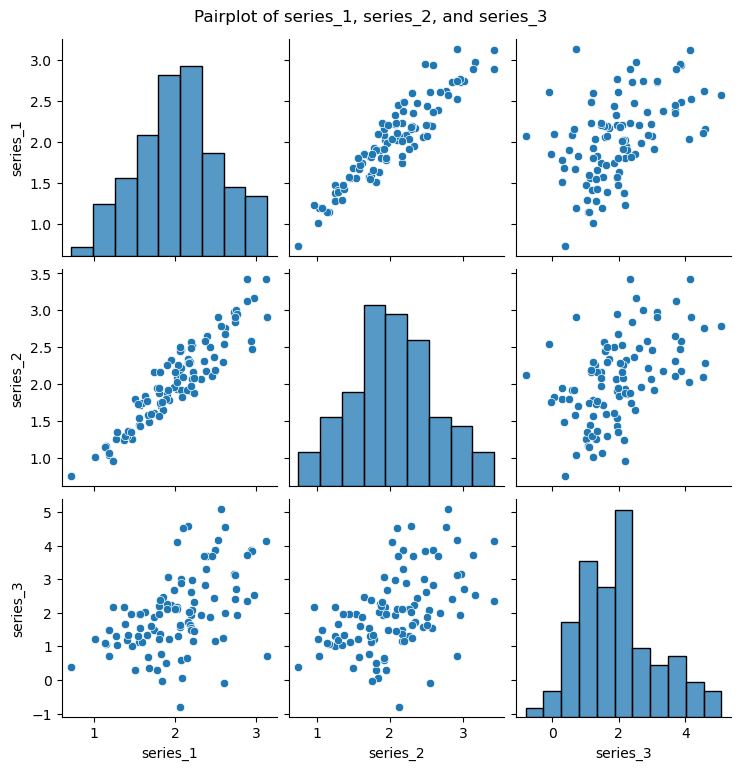

In [2]:
# Pairplot for all three series
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Recreate the data
np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc=2, scale=0.5, size=num_points)
series_2 = series_1 * (1 + np.random.normal(loc=0, scale=0.1, size=num_points))
series_3 = series_1 * (1 + np.random.normal(loc=0, scale=0.5, size=num_points))

# Put into DataFrame
df = pd.DataFrame({'series_1': series_1, 'series_2': series_2, 'series_3': series_3})

# Plot pairplot
sns.pairplot(df)
plt.suptitle("Pairplot of series_1, series_2, and series_3", y=1.02)
plt.show()


Answer: 
What can be said about the three outliers in the upper left corner of the graph?

The three outliers in the upper left corner of the PCA scatter plot have:
A low first principal component (PC1) score
A high second principal component (PC2) score

----------

Is their first principal component score high or low? 
The first principal component (PC1) score of the three outliers in the upper left corner is low.
PC1 (x-axis): Low

-----------

What about their second principal component score? 
The second principal component score for the three outliers in the upper left corner is high — that’s why they appear high on the vertical axis in the PCA scatter plot.
PC2 (y-axis): High

----------------
What does that mean about their values in series_1, series_2, and series_3? 

For the three outliers in the upper left corner of the PCA scatter plot:
Low PC1 score
Based on:
PC1 ≈ 0.265 × series_1 + 0.301 × series_2 + 0.916 × series_3
Strongly influenced by series_3
Which implies: series_3 is very low

High PC2 score
Based on:
PC2 ≈ 0.603 × series_1 + 0.689 × series_2 − 0.401 × series_3
Contrasts series_1 and series_2 with series_3
Which implies: series_1 and series_2 are high, while series_3 is low

Summary:
The three outliers have very low values in series_3, and high values in series_1 and series_2.

-----------------------------

It seems to me that you can say something about series_3 (what can you say?) 
Based on PCA loadings:
PC1 ≈ 0.265 × series_1 + 0.301 × series_2 + 0.916 × series_3
Heavily weighted by series_3
The outliers have very low PC1 scores
Therefore: We can confidently say that the values of series_3 for those outliers are very low.

------------------

But you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2. Why is that?
Because series_1 and series_2 are strongly correlated and almost redundant, PCA treats them as moving together, making it hard to separate or compare them individually — especially their relative value.

----------------------

How are series_1 and series_2 related, according to how they were created? 
They are strongly correlated because series_2 was created directly from series_1 with only a small amount of random noise added
Based on the above code:
series_1 is drawn from a normal distribution.
series_2 is just series_1 multiplied by a small noise factor (with ~10% standard deviation).

----------------
Pairplot has been plotted above
If you like, try drawing a pairplot for all three series and see what you get.
What we get from the paiplot summary:
Observations:
series_1 vs series_2:
    The scatter plot shows a tight, linear relationship, confirming they are strongly positively correlated.
    This is expected because series_2 was generated as a noisy copy of series_1.

series_1 vs series_3 and series_2 vs series_3:
    These relationships are still positively correlated, but with much more scatter/widely scattered.
    This reflects the fact that series_3 was generated with much higher noise, so the relationship is weaker and less predictable.

Histograms on the diagonal:
Show the distributions of each variable:

All are roughly normal, but series_3 has a wider spread (higher variance), consistent with the higher noise.

Summary of the Pairplot:
Confirms that series_1 and series_2 are nearly redundant.
Shows that series_3 is more variable and less tightly coupled with the others.
Supports the PCA results where series_3 dominates PC1 and distinguishes the outliers. 

----------------
Overall, what are the advantages and disadvantages of the graph below?
Advantages:
1. Dimensionality Reduction -Transforms 3D data (series_1, series_2, series_3) into a clear 2D plot.
PC1 and PC2 together explain ~99% of the variance (80% + 19%).

2. Highlights Structure and Relationships
Identifies outliers — like the 3 points in the upper left corner.
Shows clusters or separation if they exist.

3. Reveals Variable Importance
Through PCA loadings, we learn that:series_3 is the main driver of variance (heavily loads on PC1).
PC2 captures the contrast between series_1/series_2 and series_3.

Disadvantages:
1. Loss of Interpretability
Axes are abstract (PC scores, not original variables).You can’t immediately tell what a high or low score "means" without checking PCA loadings.

2. Can't Distinguish Correlated Variables
PCA bundles together variables that are strongly correlated.
In this case, PCA treats series_1 and series_2 as nearly the same, making it impossible to distinguish between them.

3. Relative Contributions Are Blurred
Can't say how much series_1 is greater than series_2 for a given point.
The graph reflects combinations, not individual feature values.

4. Only Linear Relationships
PCA is a linear technique — it won’t capture complex, nonlinear patterns or interactions.
-------------------
Does it show anything interesting?
It detects clear outliers.
Confirms feature relationships (e.g., high correlation between series_1 and series_2)
Highlights that series_3 drives most of the dataset’s variability

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

Detail Analysis:

Chronic Disease Risk Factor Analysis:

Chronic Kidney Disease (CKD)

Diabetes

Hypertension

We apply:

Exploratory Data Analysis (EDA)
Principal Component Analysis (PCA)
Correlation heatmaps
Linear regression analysis
Outlier detection
Dimensionality reduction

In [10]:
# Steps

# Load required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Set my working directory
os.chdir(r"C:\Users\jalin\Documents\data\AILeader")
print("Working directory set to:", os.getcwd())

# Load datasets
ckd_df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
diabetes_df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
hypertension_df = pd.read_csv("hypertension_dataset.csv")

# Keep only numeric columns for analysis
ckd_numeric = ckd_df.select_dtypes(include='number')
diabetes_numeric = diabetes_df.select_dtypes(include='number')
hypertension_numeric = hypertension_df.select_dtypes(include='number')


Working directory set to: C:\Users\jalin\Documents\data\AILeader


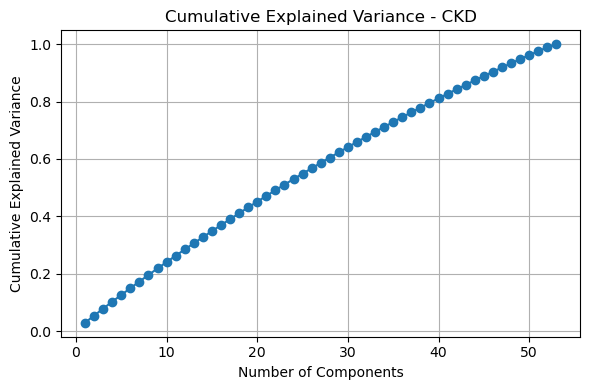

CKD First PC Variance: 0.028764515159925775


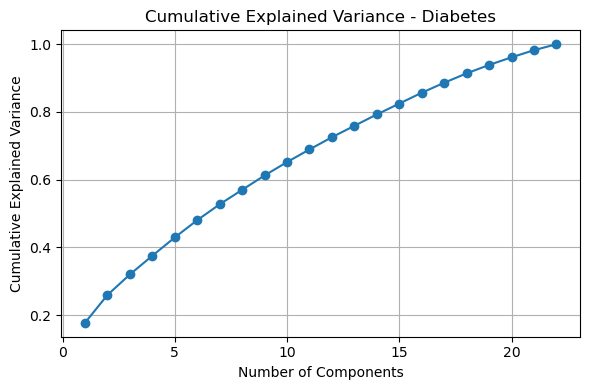

Diabetes First PC Variance: 0.1775768815902015


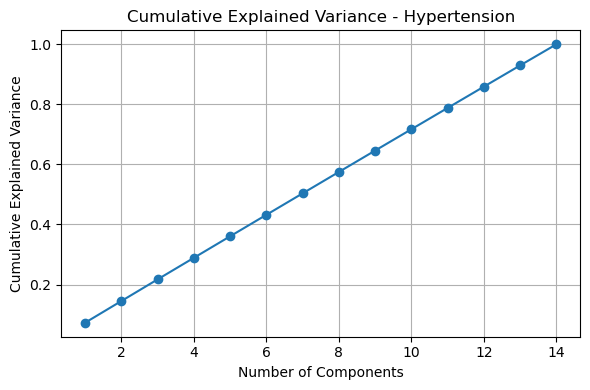

Hypertension First PC Variance: 0.07261993267128694


In [11]:
# Principal Component Analysis (PCA) - Evaluate how much variance is captured by the first few PCA components.

def perform_pca(df, features, dataset_name):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features].dropna())
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             pca.explained_variance_ratio_.cumsum(), marker='o')
    plt.title(f'Cumulative Explained Variance - {dataset_name}')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return pca.explained_variance_ratio_[0]

print("CKD First PC Variance:", perform_pca(ckd_numeric, ckd_numeric.columns, "CKD"))
print("Diabetes First PC Variance:", perform_pca(diabetes_numeric, diabetes_numeric.columns, "Diabetes"))
print("Hypertension First PC Variance:", perform_pca(hypertension_numeric, hypertension_numeric.columns, "Hypertension"))

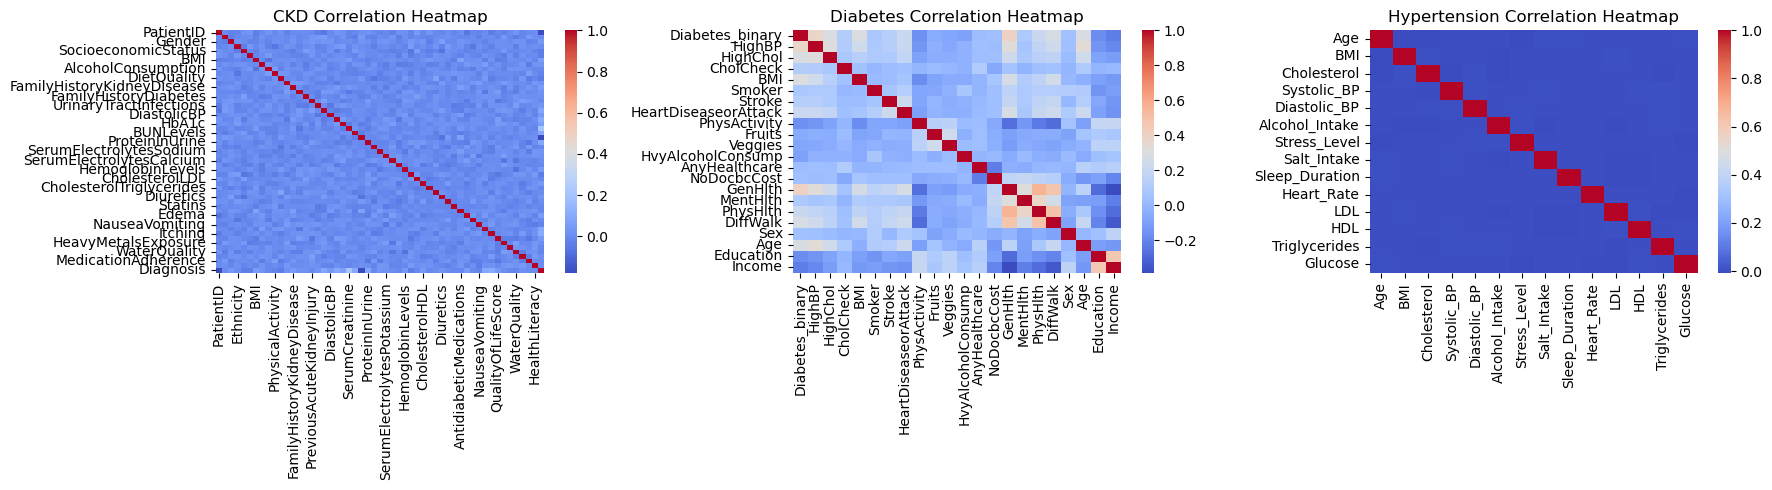

In [12]:
# Correlation Heatmaps - Identify strongly related features.

plt.figure(figsize=(18, 5))
sns.heatmap(ckd_numeric.corr(), cmap='coolwarm', ax=plt.subplot(1, 3, 1))
plt.title('CKD Correlation Heatmap')
sns.heatmap(diabetes_numeric.corr(), cmap='coolwarm', ax=plt.subplot(1, 3, 2))
plt.title('Diabetes Correlation Heatmap')
sns.heatmap(hypertension_numeric.corr(), cmap='coolwarm', ax=plt.subplot(1, 3, 3))
plt.title('Hypertension Correlation Heatmap')
plt.tight_layout()
plt.show()

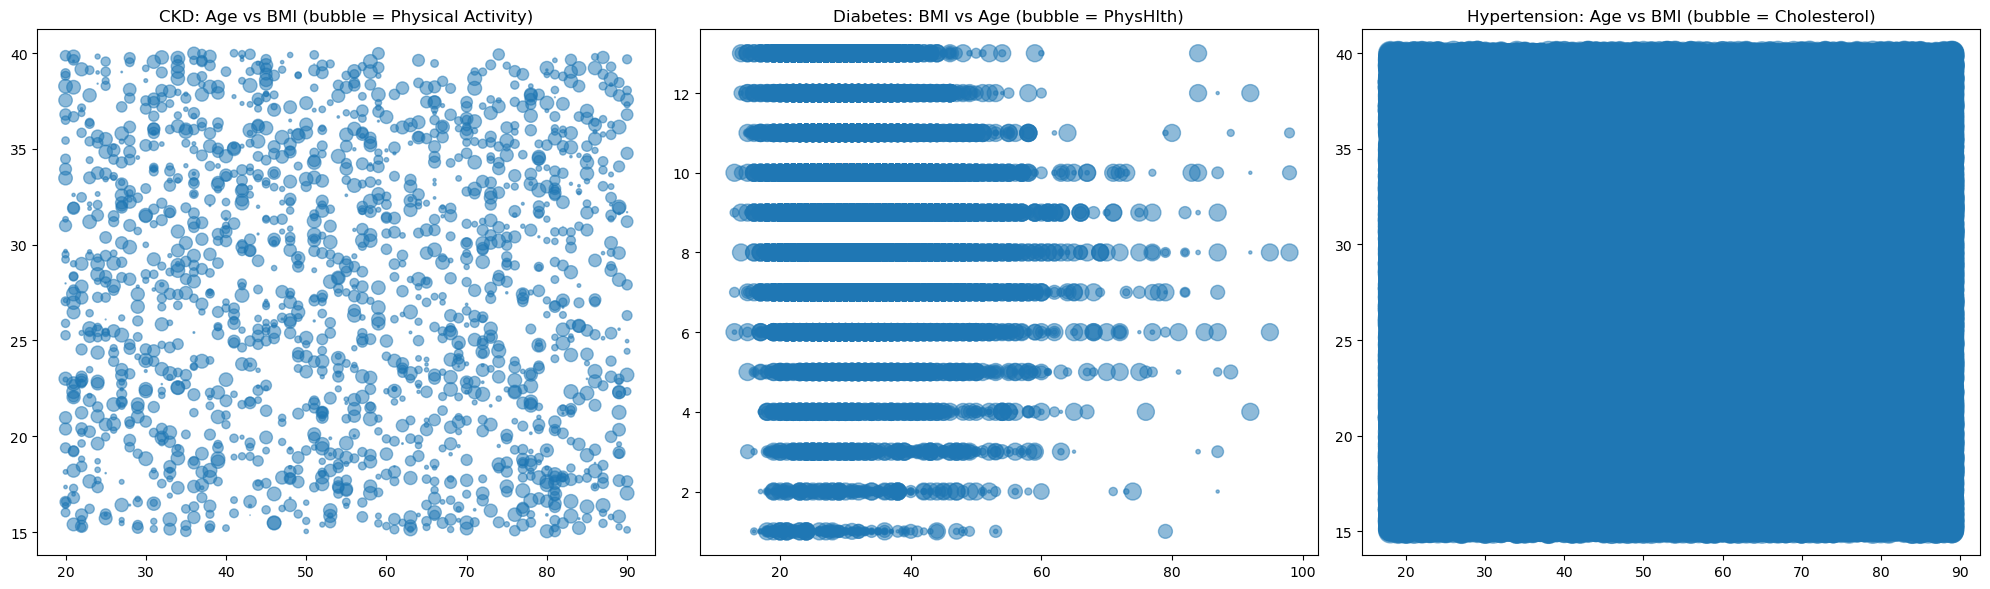

In [13]:
# Bubble Plots - Visualize variable interactions.

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].scatter(ckd_df['Age'], ckd_df['BMI'], s=ckd_df['PhysicalActivity']*10, alpha=0.5)
axes[0].set_title("CKD: Age vs BMI (bubble = Physical Activity)")
axes[1].scatter(diabetes_df['BMI'], diabetes_df['Age'], s=diabetes_df['PhysHlth']*5, alpha=0.5)
axes[1].set_title("Diabetes: BMI vs Age (bubble = PhysHlth)")
axes[2].scatter(hypertension_df['Age'], hypertension_df['BMI'], s=hypertension_df['Cholesterol'], alpha=0.5)
axes[2].set_title("Hypertension: Age vs BMI (bubble = Cholesterol)")
plt.tight_layout()
plt.show()

In [14]:
# Linear Regression -Evaluate predictive relationships using features with strong correlation to the target.

def linear_regression_analysis(df, target_column):
    corr_matrix = df.corr()
    strong_corr_features = corr_matrix[target_column][(corr_matrix[target_column].abs() > 0.3) & (corr_matrix[target_column].abs() < 1)].index.tolist()
    if not strong_corr_features:
        return f"No strong predictors for {target_column}"
    X = df[strong_corr_features].dropna()
    y = df.loc[X.index, target_column]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    return {
        "Predictors": strong_corr_features,
        "R²": r2,
        "Coefficients": dict(zip(strong_corr_features, model.coef_))
    }

print("CKD:", linear_regression_analysis(ckd_numeric, 'Diagnosis'))
print("Diabetes:", linear_regression_analysis(diabetes_numeric, 'Diabetes_binary'))
print("Hypertension:", linear_regression_analysis(hypertension_numeric, 'Systolic_BP'))

CKD: No strong predictors for Diagnosis
Diabetes: {'Predictors': ['HighBP', 'GenHlth'], 'R²': 0.23628412798907883, 'Coefficients': {'HighBP': 0.2818654344374449, 'GenHlth': 0.14278264521040457}}
Hypertension: No strong predictors for Systolic_BP


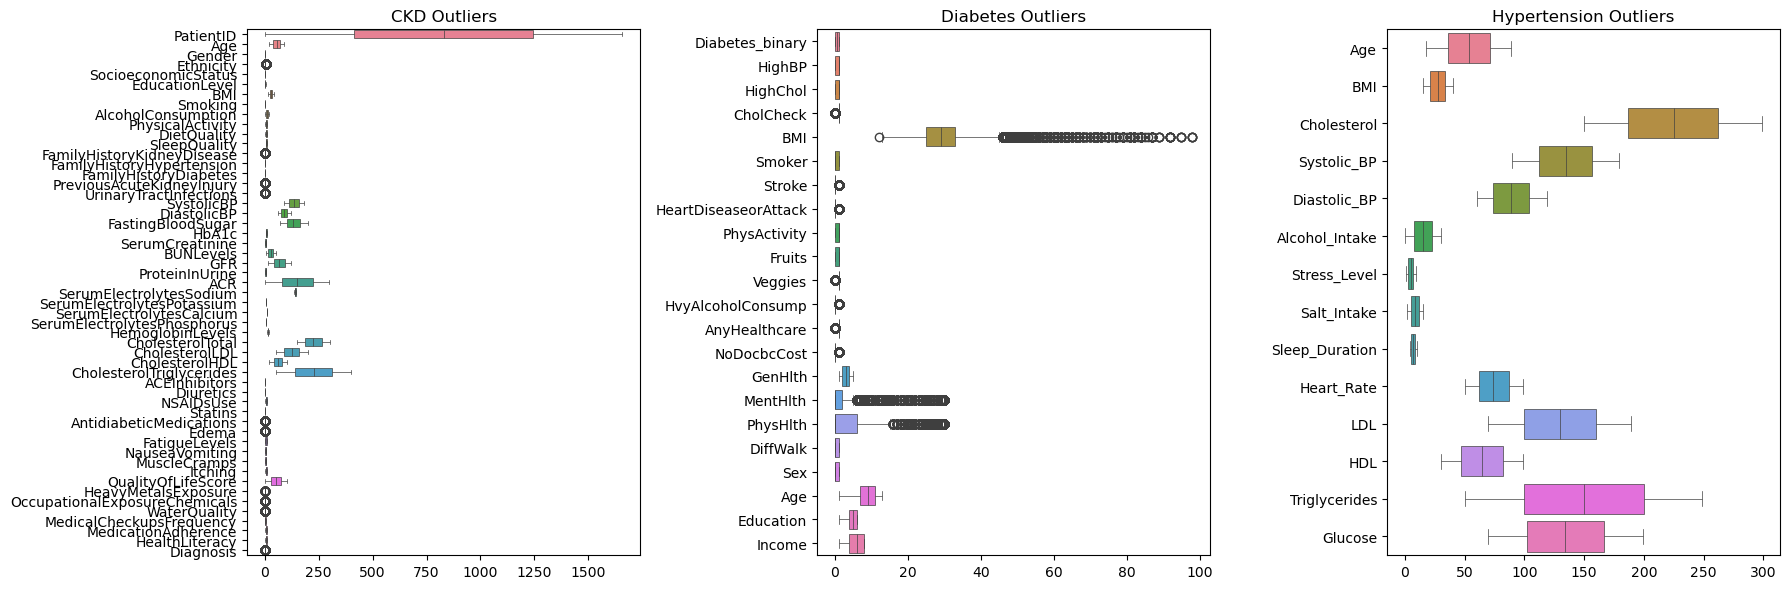

In [15]:
# Outlier Detection - Use boxplots to find unusual values that may affect modeling.

plt.figure(figsize=(18, 6))
sns.boxplot(data=ckd_numeric, orient='h', linewidth=0.5, ax=plt.subplot(1, 3, 1))
plt.title("CKD Outliers")
sns.boxplot(data=diabetes_numeric, orient='h', linewidth=0.5, ax=plt.subplot(1, 3, 2))
plt.title("Diabetes Outliers")
sns.boxplot(data=hypertension_numeric, orient='h', linewidth=0.5, ax=plt.subplot(1, 3, 3))
plt.title("Hypertension Outliers")
plt.tight_layout()
plt.show()

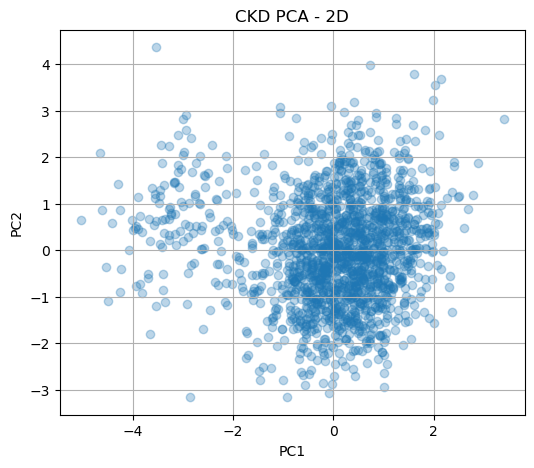

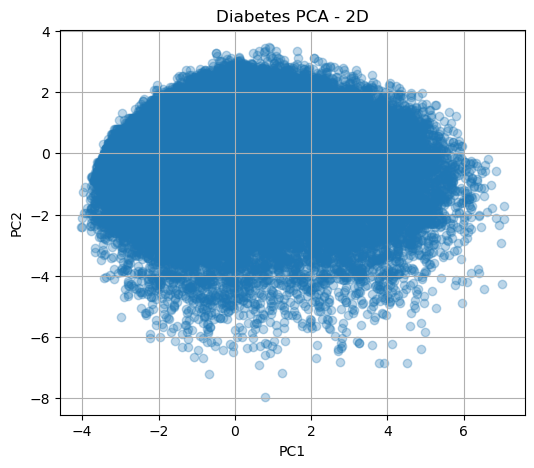

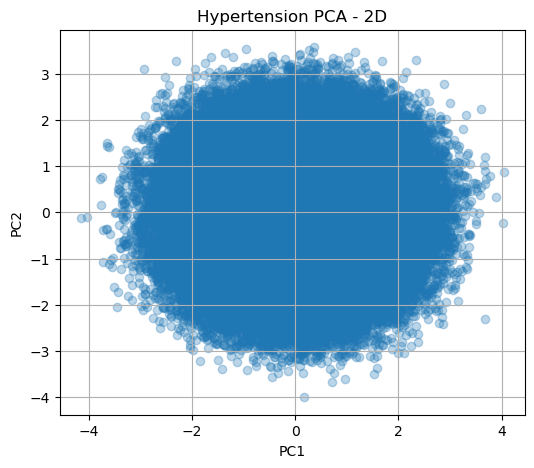

In [16]:
# 2D PCA Visualization

def plot_pca_2d(df, name):
    df_clean = df.dropna()
    scaled = StandardScaler().fit_transform(df_clean)
    pca = PCA(n_components=2).fit_transform(scaled)
    plt.figure(figsize=(6,5))
    plt.scatter(pca[:, 0], pca[:, 1], alpha=0.3)
    plt.title(f"{name} PCA - 2D")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

plot_pca_2d(ckd_numeric, "CKD")
plot_pca_2d(diabetes_numeric, "Diabetes")
plot_pca_2d(hypertension_numeric, "Hypertension")

Final Summary of findings:

Principal Component Analysis (PCA):

Diabetes: 1st PC captures ~18% variance → suitable for 2D reduction.

Hypertension: Moderate structure (~7% PC1 variance).

CKD: Very low PC1 variance (~3%) → needs more dimensions for representation.

Linear Regression:

Diabetes: HighBP and GenHlth predict Diabetes_binary moderately (R² = 0.236).

CKD & Hypertension: No strong linear predictors found above r > 0.3.

Heatmaps showed high correlations in the diabetes dataset, particularly between blood pressure, BMI, and general health.

Bubble Plots revealed expected relationships like higher cholesterol and BMI in older hypertensive individuals.

Outliers were found across all datasets. Robust preprocessing is essential for model development.

Conclusion: The diabetes dataset is highly suitable for modeling and dimensionality reduction. The CKD dataset is less structured and may require domain-specific transformation or nonlinear approaches. Hypertension shows moderate usability with some potential after cleaning.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

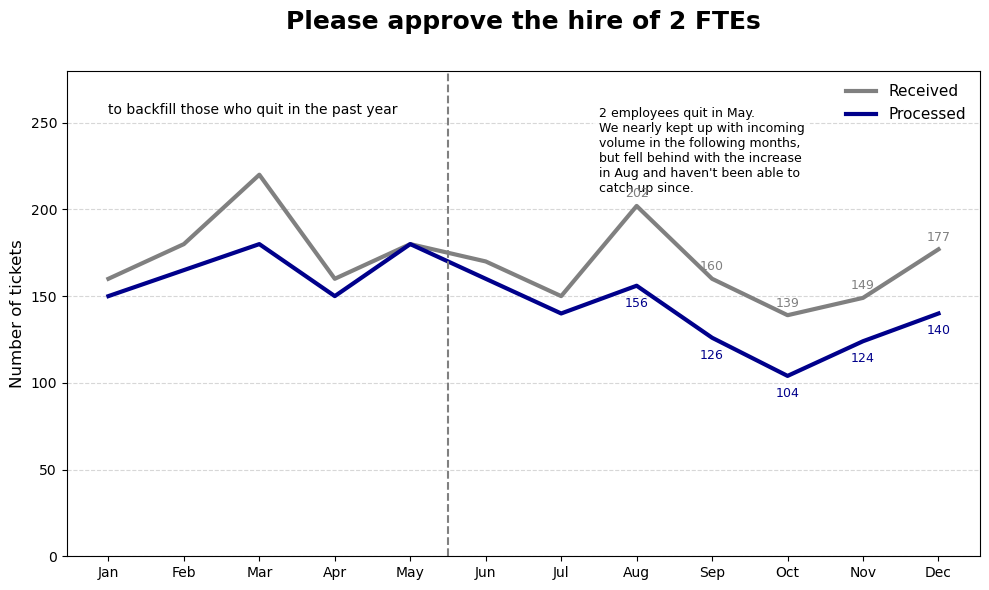

In [6]:
# Figure 5.10
plt.figure(figsize=(10, 6))
plt.plot(months, received, label='Received', color='gray', linewidth=3)
plt.plot(months, processed, label='Processed', color='darkblue', linewidth=3)

# Vertical line indicating event
plt.axvline(x=4.5, color='gray', linestyle='--')

# Main title and subtitle with better vertical spacing
plt.title("Please approve the hire of 2 FTEs", fontsize=18, weight='bold', pad=30)
plt.text(0, 255, "to backfill those who quit in the past year", fontsize=10)

# Relocated annotation 
plt.text(6.5, 210,
         "2 employees quit in May.\nWe nearly kept up with incoming\nvolume in the following months,\nbut fell behind with the increase\nin Aug and haven't been able to\ncatch up since.",
         fontsize=9, bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Data point labels (for post-May months)
for i in range(7, 12):
    plt.text(i, received[i] + 5, str(received[i]), color='gray', ha='center', fontsize=9)
    plt.text(i, processed[i] - 12, str(processed[i]), color='darkblue', ha='center', fontsize=9)

# Axes labels and grid
plt.ylabel("Number of tickets", fontsize=12)
plt.ylim(0, 280)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
plt.legend(frameon=False, fontsize=11)

plt.tight_layout()
plt.show()


I re-generated Figure 5.10 - Add action title and annotation